# Air Quality Prediction

In [30]:
#All Important Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [41]:
#Import Training CSV File
df=pd.read_csv("Train/Train.csv")

x=np.array(df)  #Converting dataframe into numpy array in order to access element
Y=df.target     #Saving the target values in Y
x=x[:,:5]       #Making x an array having all 5 features
ones=np.ones((x.shape[0],1))  
X=np.append(ones,x,axis=1)   #Since first element i.e x[0] should be 1, so we have added 1 as the first column


#Import Test CSV File
df_test=pd.read_csv("Test/Test.csv")  #Reading Test data
X_test=np.array(df_test)
X_test=np.append(np.ones((X_test.shape[0],1)),X_test,axis=1)  #adding 1 as column 1 in test data

In [42]:
#Print Shape Of Training Data
print("Shape of Training data " ,X.shape)

Shape of Training data  (1600, 6)


In [43]:
#creating hypothesis function
def hypothesis(x,theta):       
    result=np.dot(theta,x.T)
    return(result)

In [66]:
#creating prediction function which uses X_test and theta values to predict the Y value
def predictions(X,theta):     
    y_pred = []
    
    for i in range(X.shape[0]):
        pred = hypothesis(X[i],theta)
        y_pred.append(pred)
    y_pred = np.array(y_pred)
    return (y_pred)

In [67]:
#calculating error
def get_error(X,Y,theta):
    e = 0
    m = X.shape[0]
    for i in range(m):
        e += (hypothesis(X[i],theta)-Y[i])**2
        
    return(e)

In [68]:
def getGradients(X,Y,theta):    
    grads = np.zeros((X.shape[1]))
    n = len(grads) # no. of features inc. bias
    m = X.shape[0]
    for i in range(m):
        hx = hypothesis(X[i],theta)
        for grad_index in range(n):
            grads[grad_index] += (hx - Y[i])* X[i,grad_index]           
        
    return (grads)

In [69]:
#Calculating Batch Gradient
def batchgrad(X,Y,theta,batch_size=100):
    m=Y.shape[0]
    indices=np.arange(m)
    np.random.shuffle(indices)
    indices=indices[:batch_size]
    grad=np.zeros((X.shape[1]))
    n=len(grad)
    for i in indices:
        hx=hypothesis(X[i],theta)
        for grad_index in range(n):
            grad[grad_index] += (hx - Y[i])* X[i,grad_index]           
        
    return (grad)

In [74]:
#Calculating Batch Gradient
def miniBatchGradientDescent(X,Y,maxItr=100, learning_rate = 0.001):
    
    theta = np.zeros((X.shape[1]))
    error = []
    n=len(theta)
    for i in range(maxItr):
        grad=batchgrad(X,Y,theta)
        e=get_error(X,Y,theta)
        for theta_index in range(n):
            theta[theta_index]-=learning_rate*grad[theta_index]
        error.append(e)

    return (theta,error)

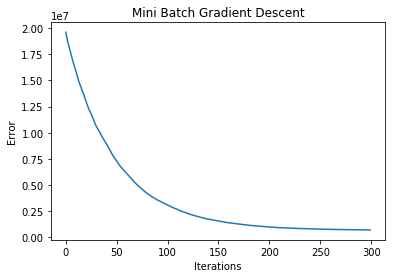

In [76]:
#Drawing Data
plt.figure(3)
theta_minibatch, error_minibatch=miniBatchGradientDescent(X,Y,300,0.0001)
sns.lineplot(data = np.array(error_minibatch))
plt.title("Mini Batch Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

In [77]:
ans=predictions(X_test,theta_minibatch)
print(ans)
# plt.plot(ans)

[ 109.50949716  111.52179649  -20.60307194  -42.35113482  -93.60125225
  -45.20160158  -73.28874442   23.2433242   164.58098498  164.46153237
 -101.50690772  -19.6902974    -4.29930366  115.224273     37.09192194
   43.09829051 -183.37007447   20.54733554   10.82296238  128.08368053
   61.96122602  -60.19323953 -104.43915857   -9.79343303  -54.84889264
   12.34200869   26.70918529  103.98386265   20.39120225  -25.34176991
  105.1407824   -44.04924996  207.11470581  -16.01973339 -219.78128585
  146.15075073   -4.46509921   12.34357349 -294.48121864   72.90206146
  -79.21738086 -198.28773014 -228.19791506  126.58005573  -71.33584949
   97.04652151   -4.66098283   19.28574863  -94.5157055   -27.77153293
   10.92268657 -168.5877587    61.61290765  -94.4525821  -102.73274384
 -149.00539613   58.91367228  104.3719126   -71.20303569   40.75059012
   38.08405706  -50.41330435  156.94583594   39.95706298   53.38198479
   20.69666595   76.50303047   -3.67692376   -3.3873543     0.72508542
  -24.